Question 1: 
    The standard deviation shows us the dispersion of the data around the mean, telling us how spread out the data is. The standard error of the mean shows how how percise the sample mean is as an estimate of the population mean, telling us how much the sample mean would vary if multiple tests are taken.

Question 2:
    First, we calculate the sample mean of the data. Second, we divide the sample's standard deviation by the square root of the sample size to get the standard error of the mean(SEM). Third, we use the 95% confidence interval, which is about 1.96 SEM for a normal distribution. Last, we use the formula (Confidence Interval = Sample Mean ± 1.96 × SEM) to get the estimate of the '95% confidence interval which "covers 95% of the bootstrapped sample means.'

Question 3: 
    we generate bootstrapped samples many time and collect the bootstrapped means. The 95% confidence means that we take the middle 95% of the means, which means we will exclude the highest 2.5% and the lowest 2.5%. we can either arrange all the bootstrapped means in orders and find the 2.5th and 97.5th percentiles manually, or we can use the np.quantile(...) funtion. If we want the middle 95%, we would use np.quantile(bootstrapped_means, [0.025, 0.975]).

Question 4:

In [ ]:
import numpy as np

# Sample data
data = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# Number of bootstrap samples
n_bootstrap_samples = 10000

# Array to store the bootstrapped means (or other statistics)
bootstrapped_means = np.empty(n_bootstrap_samples)

# Create bootstrap samples and calculate the mean for each sample
for i in range(n_bootstrap_samples):
    # Resample data with replacement
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    
    # Compute the statistic of interest (mean in this case)
    bootstrapped_means[i] = np.mean(bootstrap_sample)  # Change np.mean to np.median for the median

# Calculate the 95% bootstrap confidence interval
confidence_interval = np.quantile(bootstrapped_means, [0.025, 0.975])

# Output the result
print(f"95% Bootstrap Confidence Interval for the Mean: {confidence_interval}")

# Comment: To calculate a 95% confidence interval for the median instead of the mean,
# simply change np.mean(bootstrap_sample) to np.median(bootstrap_sample) above.
# Example:
# bootstrapped_medians[i] = np.median(bootstrap_sample)

# This can be applied to any other statistic (e.g., variance, standard deviation):
# bootstrapped_variances[i] = np.var(bootstrap_sample)

https://chatgpt.com/share/66fac650-d9f0-800b-aee6-c5c90f7ea005

Question 5: 
    The population parameter is the value that we are trying to estimate, and the sample statistic is something we are calculating using the sample. When it comes to confidence interval, we are using the sample statistic to try to get a range that is likely to contain the population parameter.

https://chatgpt.com/share/66fac844-6a78-800b-98fc-878a9797b1d0

Question 6: 
1. the process of bootstrapping is to take a sample and generate many other samples based on that sample. We ramdomly select data points from that sample to form new sample. The amount of data points in the generated sample should be the same as the original sample. For each bootstrap sample, we calculate the desired statistic, and after repeating the process, we will get an distribution of our desired statistic.

2. The main purpose of bootstraping is to estimate the distribution of the statistics when we have a small sample size or when other methods are inapplicable. Using bootstrapping, we can estimate the standard errors generate confidence intervals.

3. we can apply the bootstrapping process to the sample, and get the distibution of the mean of the boostrapped samples. Then we take the middle 95 percent of the bootstrap mean to create a 95% confidence interval for the population mean. If the hypothesized guess of the average falls within the confidence interval, then it suggest that the hypothesized guess might be plaisible.

Question 7: 
    if the confidence interval overlap with zero, it means that zero is in the range of possible values where we expect the population parameter to lie, which means that the true mean could be zero. On the other hand, if the confidence interval does not include zero, it means that our range of possible values for the population means does not include zero, so there is no possibility that the population mean is zero.

Question 8: 

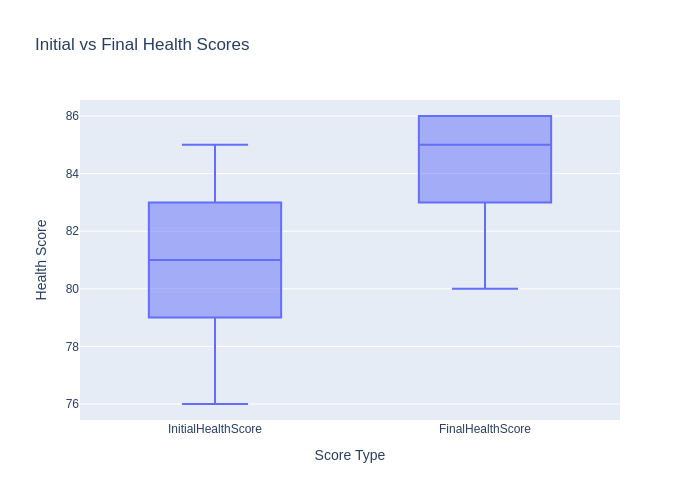

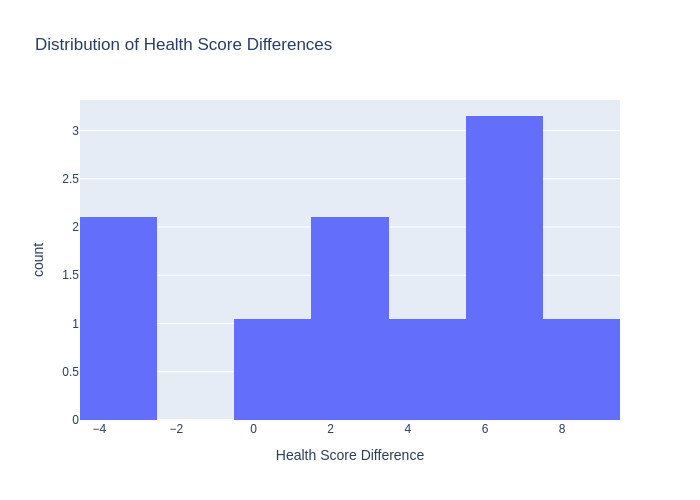

In [44]:
import pandas as pd
import plotly.express as px

data = pd.read_csv('patient.csv')

data['HealthScoreDiff'] = data['FinalHealthScore'] - data['InitialHealthScore']

fig_box = px.box(data, y=['InitialHealthScore', 'FinalHealthScore'], 
                  labels={'value': 'Health Score', 'variable': 'Score Type'},
                  title='Initial vs Final Health Scores')
fig_box.show(renderer="png")

fig_hist = px.histogram(data, x='HealthScoreDiff', nbins=10, 
                         title='Distribution of Health Score Differences',
                         labels={'HealthScoreDiff': 'Health Score Difference'})
fig_hist.add_trace(px.histogram(data, x='HealthScoreDiff', 
                                 nbins=10, 
                                 histnorm='probability density').data[0])  # Adding KDE
fig_hist.show(renderer="png")


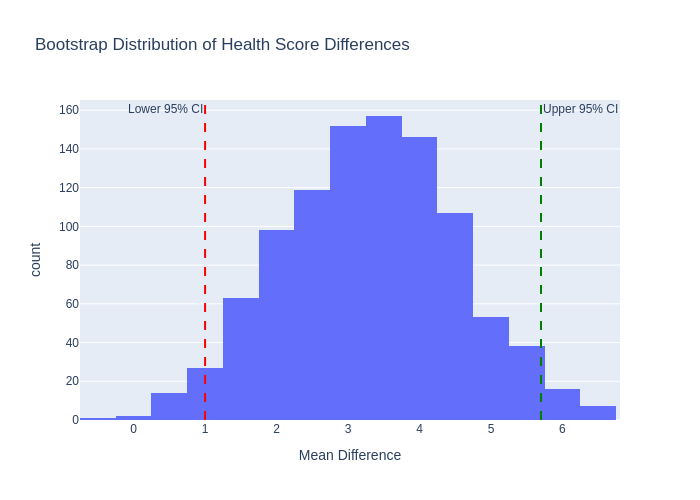

In [43]:
import numpy as np

np.random.seed(50)

def bootstrap_mean_diff(data, n_resamples=1000):
    bootstrapped_diffs = []
    for _ in range(n_resamples):
        sample = data.sample(frac=1, replace=True)
        mean_diff = np.mean(sample['FinalHealthScore'] - sample['InitialHealthScore'])
        bootstrapped_diffs.append(mean_diff)
    return np.array(bootstrapped_diffs)

boot_diffs = bootstrap_mean_diff(data)

ci_lower, ci_upper = np.percentile(boot_diffs, [2.5, 97.5])

fig_bootstrap = px.histogram(x=boot_diffs, nbins=30, 
                              title='Bootstrap Distribution of Health Score Differences',
                              labels={'x': 'Mean Difference'})
fig_bootstrap.add_vline(x=ci_lower, line_dash='dash', line_color='red', 
                         annotation_text='Lower 95% CI', annotation_position='top left')
fig_bootstrap.add_vline(x=ci_upper, line_dash='dash', line_color='green', 
                         annotation_text='Upper 95% CI', annotation_position='top right')
fig_bootstrap.show(renderer="png")


1. AliTech has released a new vaccine. Our Null Hypothesis (H0) is that the vaccine has no effect on patient health, meaning the change in health scores has nothing to do with the vaccine. Our Alternative Hypothesis (H1)is that the vaccine has a positive effect, which is why the health scores of the patients improved.
After running the bootstrapping analysis, if the 95% confidence interval does not contain 0, we reject the null hypothesis, concluding that the vaccine likely has an effect. If 0 is within the confidence interval, we cannot conclude that the vaccine has a positive effect. 


2. Data Visualization
Visualizations provide an overview of the data, helping to illustrate differences in health scores.
Methods Used:
Box Plot: To compare initial and final health scores.
Histogram: To show the distribution of the differences in health scores.

3. Quantitative Analysis
Method Used: 
Bootstrapping: To estimate the sampling distribution of the mean differences in health scores.
Steps: 
Randomly resample the data.
Calculate the mean difference for each sample.
Construct a confidence interval from these mean differences.

4. Conlcusion
0 does not lie within the 95% confidence interval, which means that the null hyppothesis is rejected and we are able to concluded that the vaccine likely does have an effect.
Further considerations: Something to consider in the future is that a larger sample size would have given us a better result. Also, in future studies, we could consider if the effect of the vaccine varies across different groups.

https://chatgpt.com/share/66fadd38-3c70-8001-aef5-42a9ba726b0b

Question 9： Working on it